# Give Me Some Credit

Importing libraries and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [2]:
#importing training data to pandas dataframe
df=pd.read_csv('cs-training.csv')
dftest=pd.read_csv('cs-test.csv')
#print(df)

dfy=df.iloc[:,1:2] #set the target column separate from dataframe
df=df.iloc[:,2:] #featuresx
dftest=dftest.iloc[:,2:]
df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


Fill-in the missing values (nan) with the column means. (Use pd.fillna() or See Ch 4 of PML)

In [3]:
df.fillna(df.mean(),inplace=True)
dftest.fillna(df.mean(),inplace=True)

Standardizing the data.

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(df)
X_test_std = sc.transform(dftest)

y=dfy.iloc[:, 0].values

Select the 2 most important features using LogisticRegression with L1 penalty. (Adjust C until you see 2 features)

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=5e-4, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.

lr.fit(X_train_std, y)

#print('Training accuracy:', lr.score(X_train_std, y_train))
#print('Test accuracy:', lr.score(X_test_std, y_test))

np.set_printoptions(8)
print(lr.intercept_)
print(lr.coef_[lr.coef_!=0].shape)
print(lr.coef_)
print("redundant feature count: ",sum(lr.coef_[0]==0))

[-2.46312775]
(2,)
[[ 0.         -0.20222797  0.09574359  0.          0.          0.
   0.          0.          0.          0.        ]]
redundant feature count:  8


Note:
Based on the result of L1 , C=5e-4 

print(lr.coef_)
[[ 0.         -0.20222533  0.09574871  0.          0.          0.
   0.          0.          0.          0.        ]]
   
corresponding features are age and NumberOfTime30-59DaysPastDueNotWorse

Now choosing only 2 features from training data set

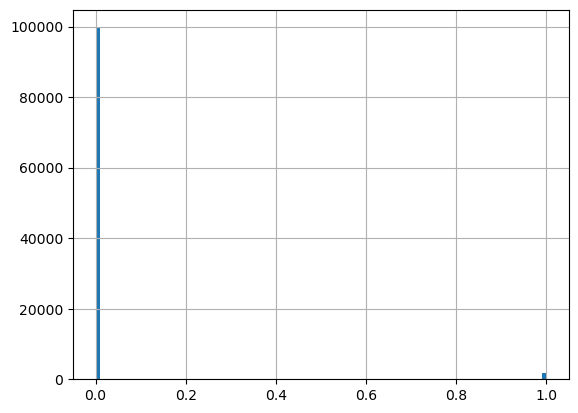

In [6]:
#standardization of the data
X_train=df.iloc[:,1:3]
X_test=dftest.iloc[:,1:3]

X_train_std = sc.fit_transform(df.iloc[:,1:3])
X_test_std = sc.transform(dftest.iloc[:,1:3])
X_train_std

# sample entry
dfse=pd.read_csv('sampleEntry1.csv',index_col=0)
dfse['binprob'].hist(bins=100)

y_test=dfse['binprob'].values

# Decision tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\martinbandung\AppData\Local\Temp\ipykernel_1636\4250499899.py:32: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\martinbandung\AppData\Local\Temp\ipykernel_1636\4250499899.py:46: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

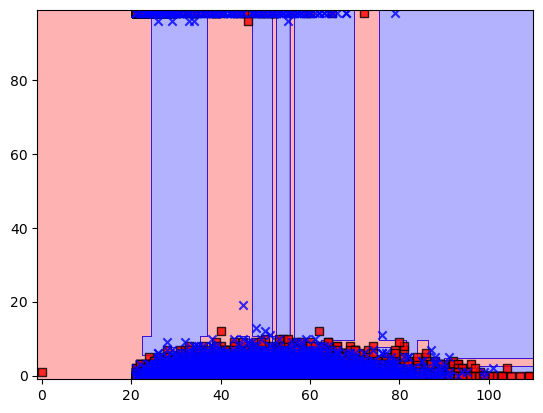

In [35]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=100, 
                                    random_state=1)
tree_model.fit(X_train, y)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y, y_test))

plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=(1000))

plt.xlabel('age')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorse')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

<AxesSubplot:>

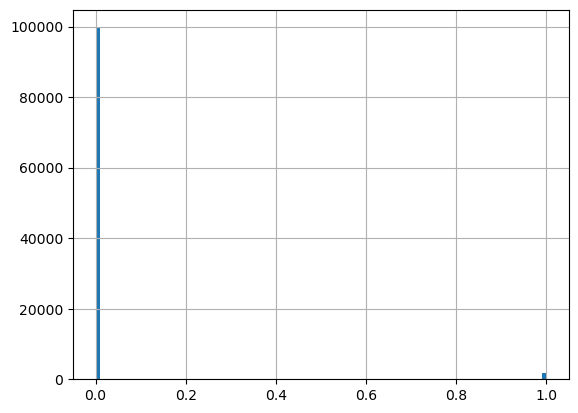

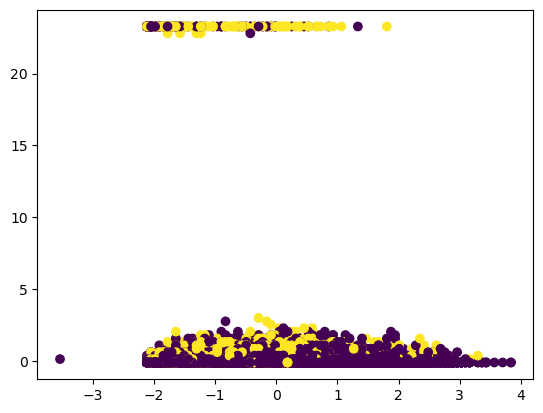

In [7]:
X_train_std
xs,ys=zip(*X_train_std)


plt.scatter((xs),(ys),c=dfy['SeriousDlqin2yrs'])
#plt.ylim(-0.1, 3)

C:\Users\martinbandung\AppData\Local\Temp\ipykernel_13224\1444919687.py:1: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(xs),np.log(ys),c=dfy['SeriousDlqin2yrs'])


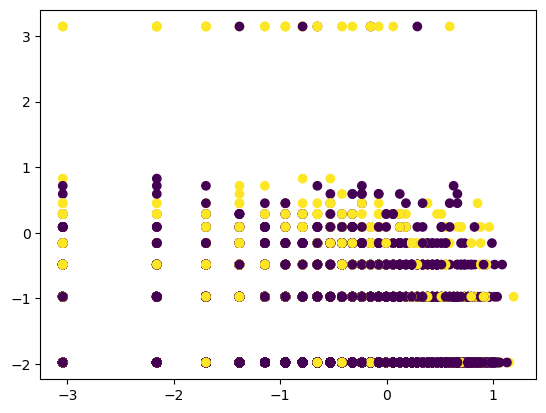

In [8]:
plt.scatter(np.log(xs),np.log(ys),c=dfy['SeriousDlqin2yrs'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


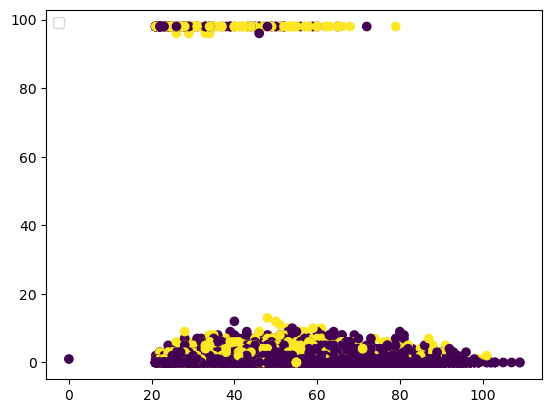

In [14]:
plt.scatter(X_train['age'],X_train['NumberOfTime30-59DaysPastDueNotWorse'],c=dfy['SeriousDlqin2yrs'])
plt.legend(loc='upper left')

In [ ]:
#this one take quite a long time to run, it just plot the changing C values to the weight

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

  
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 3.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y)
    weights.append(lr.coef_[0]) #change from 1 to 0
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column], #index error? -> change prev(column+1) delete to be column
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-4), 10**(3)])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/plot_C1.png', dpi=300,bbox_inches='tight', pad_inches=0.2)
plt.show()

In [ ]:
#SVM takes VERY long time
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=5e-4)
svm.fit(X_train_std, y)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 100))
plt.xlabel('age [standardized]')
plt.ylabel('NumberOfTime30-59DaysPastDueNotWorseh [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_train_std, y)
plot_decision_regions(X_train_std, y,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_14.png', dpi=300)
plt.show()

In [37]:
np.log(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,age,NumberOfTime30-59DaysPastDueNotWorse
0,3.806662,0.693147
1,3.688879,-inf
2,3.637586,0.000000
3,3.401197,-inf
4,3.891820,0.000000
...,...,...
149995,4.304065,-inf
149996,3.784190,-inf
149997,4.060443,-inf
149998,3.401197,-inf


In [ ]:
plt.scatter(np.log(xs),np.log(ys),c=dfy['SeriousDlqin2yrs'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 1   age                                   150000 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 3   DebtRatio                             150000 non-null  float64
 4   MonthlyIncome                         150000 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 6   NumberOfTimes90DaysLate               150000 non-null  int64  
 7   NumberRealEstateLoansOrLines          150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    150000 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 11.4 MB


In [19]:
df1=pd.read_csv('cs-training.csv')

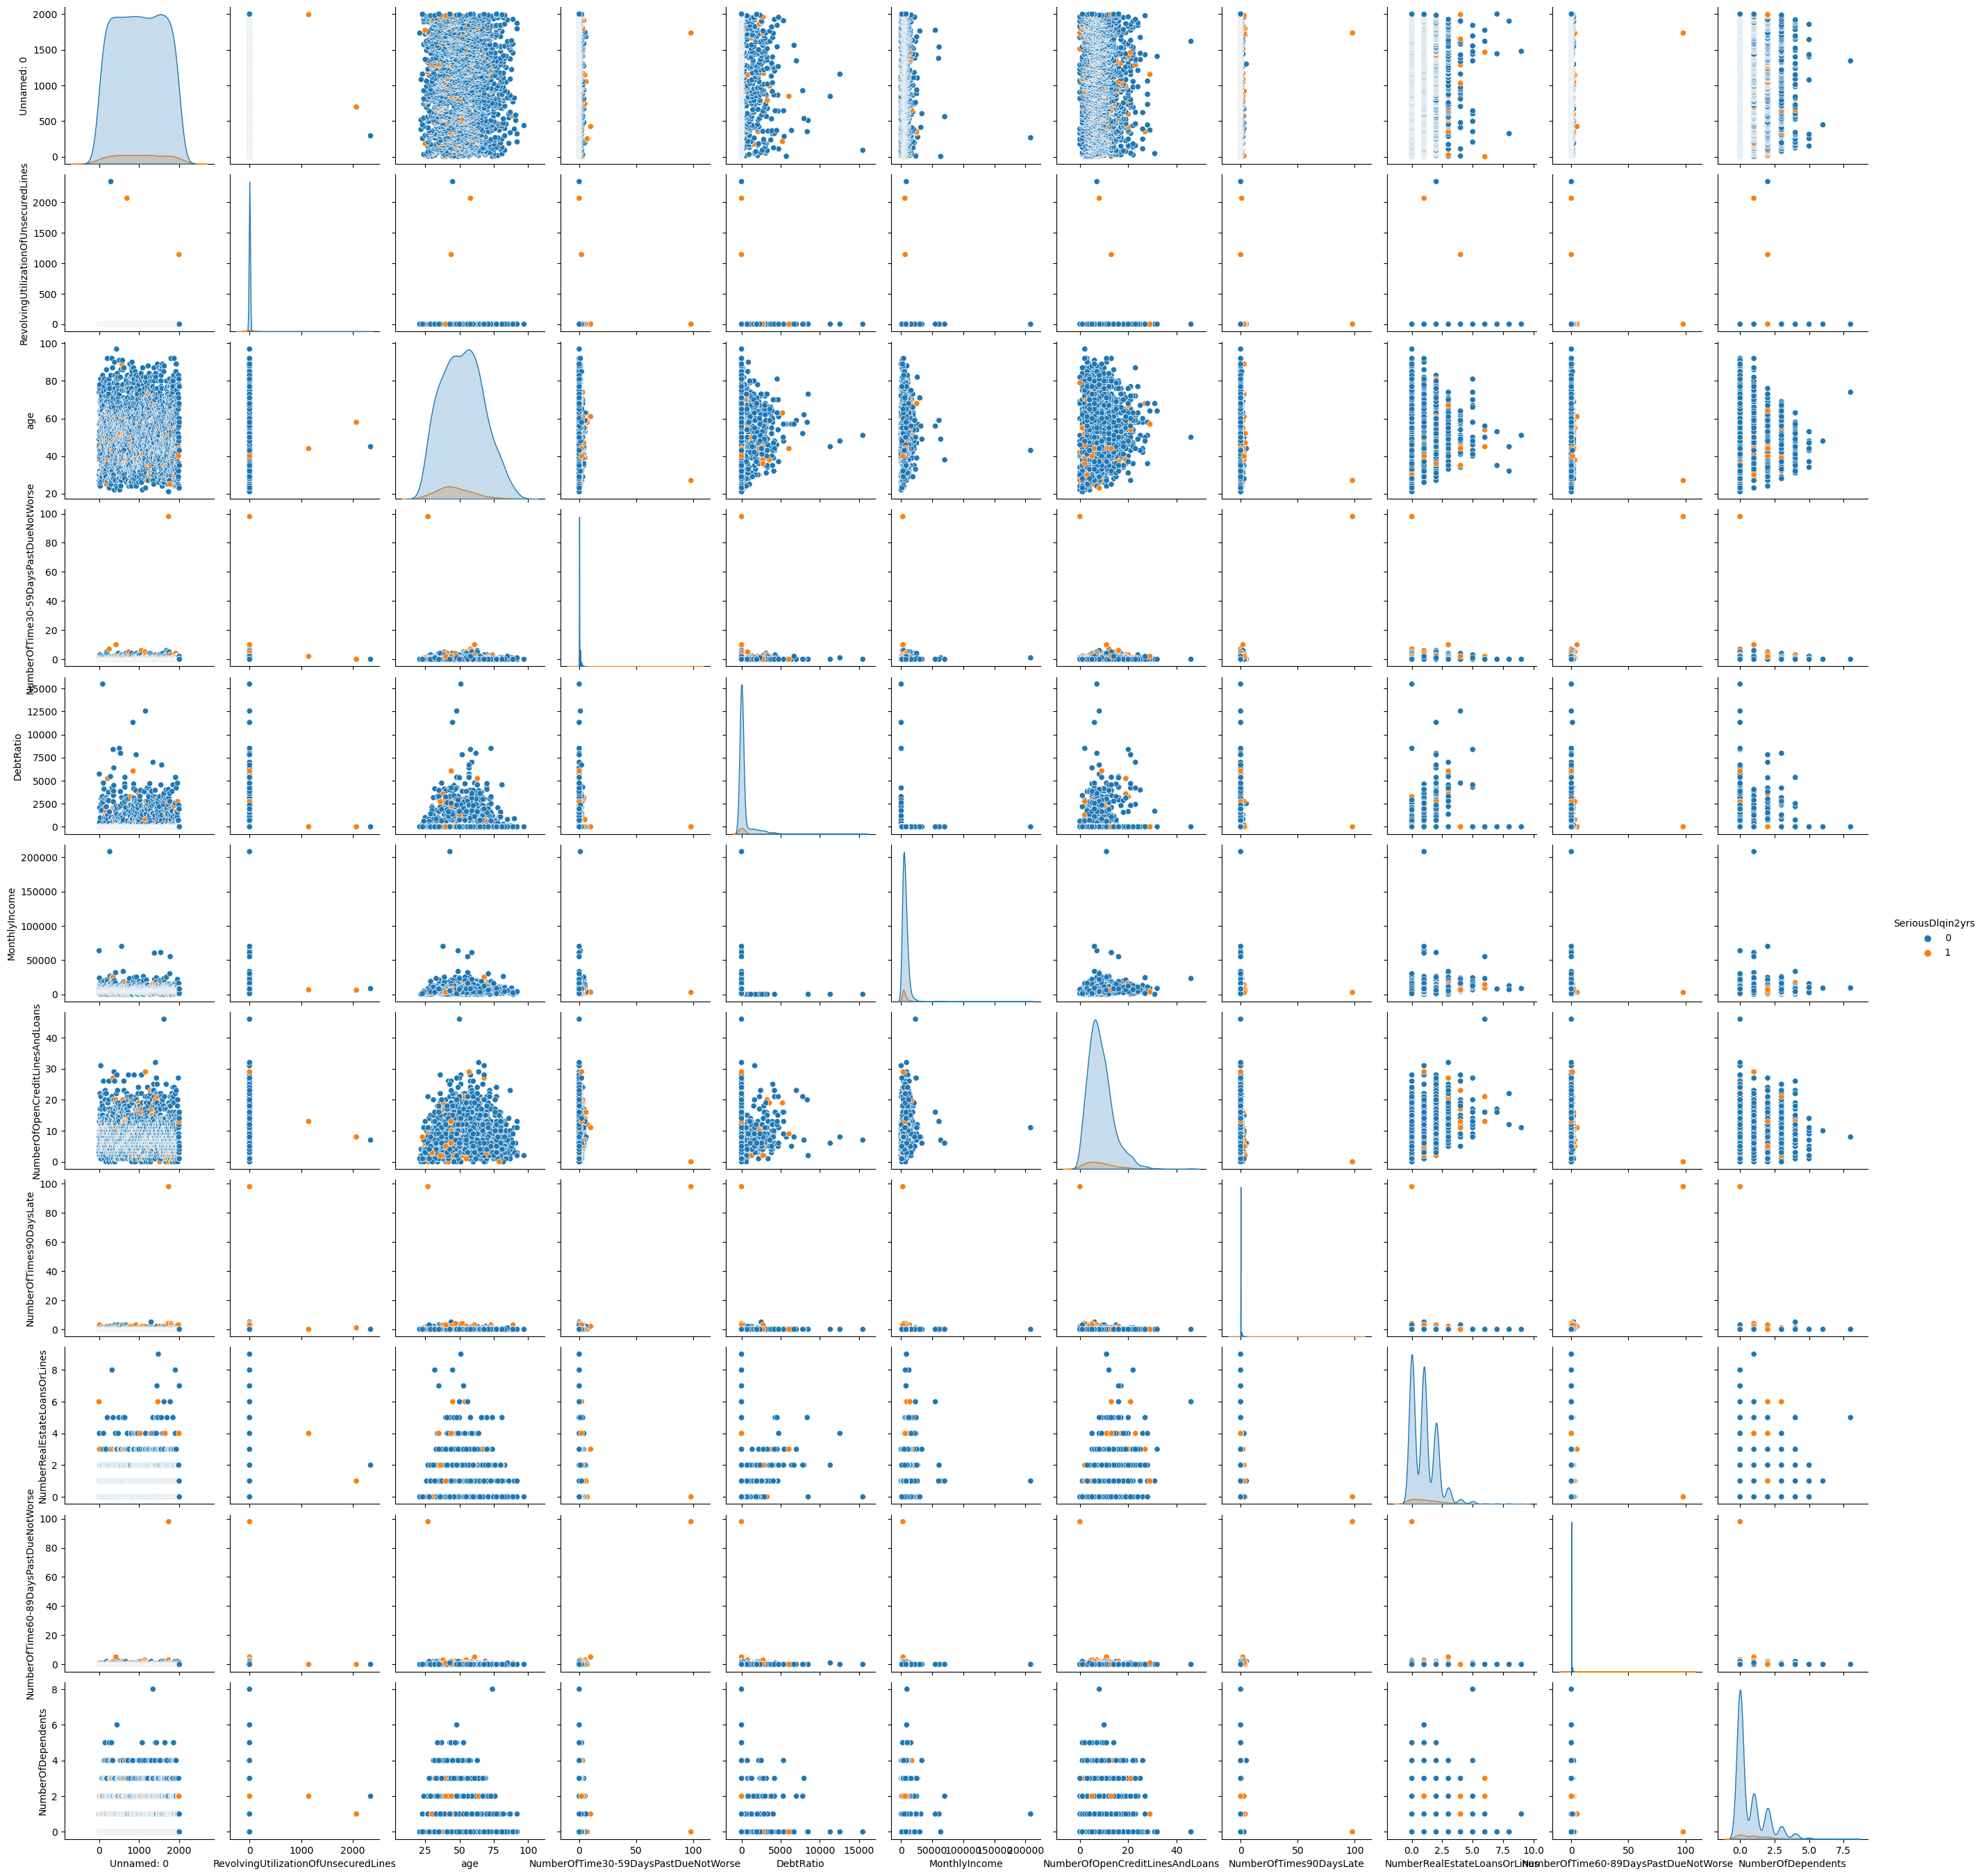

In [18]:
sns.pairplot(df1.iloc[0:2000,:], hue= 'SeriousDlqin2yrs')
plt.savefig('images/SeriousDlqin2yrs-pair.png')

In [13]:
df

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,1:3], y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

C:\Users\martinbandung\AppData\Local\Temp\ipykernel_6016\331162899.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\martinbandung\AppData\Local\Temp\ipykernel_6016\331162899.py:47: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


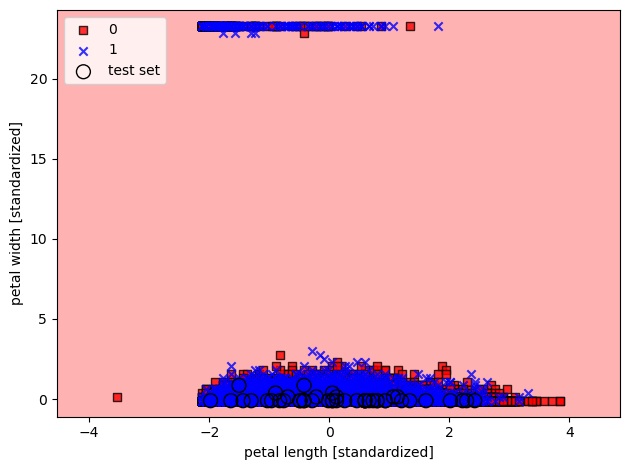

In [8]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_11.png', dpi=300)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\martinbandung\AppData\Local\Temp\ipykernel_6016\331162899.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\martinbandung\AppData\Local\Temp\ipykernel_6016\331162899.py:47: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


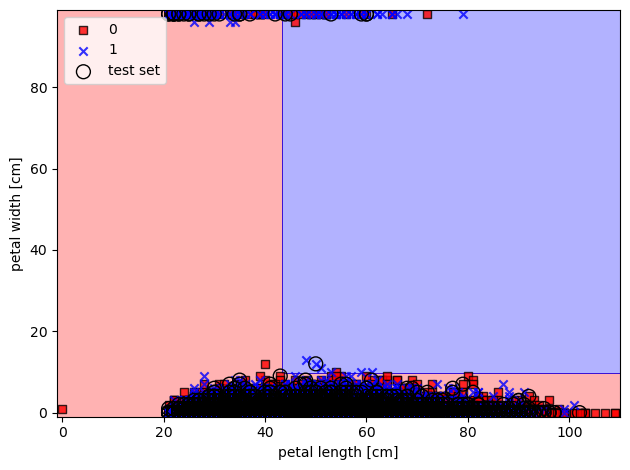

In [21]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(0, 15000))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

In [22]:
score = tree_model.score(X_test, y_test)
score

0.9332444444444444

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\martinbandung\AppData\Local\Temp\ipykernel_6016\331162899.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],
C:\Users\martinbandung\AppData\Local\Temp\ipykernel_6016\331162899.py:47: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):


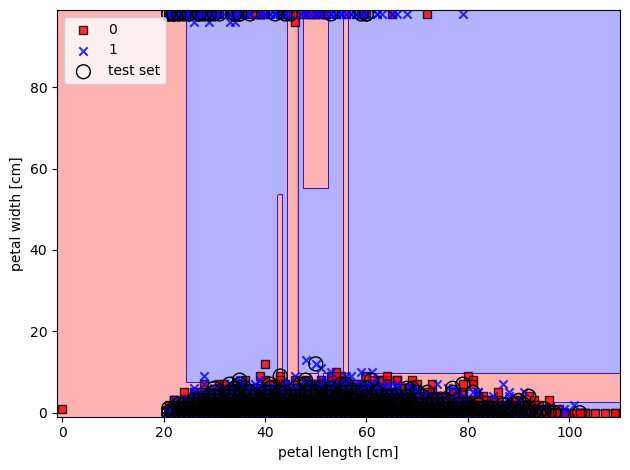

0.9333333333333333


In [24]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=10, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(0, 15000))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_20.png', dpi=300)
plt.show()

score = tree_model.score(X_test, y_test)
print(score)